In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
coefficients_df = pd.read_csv('./aviator_payouts.csv', header=None)[1::]
coefficients = [float(coef[2]) for coef in coefficients_df.values.tolist()]
print(coefficients_df.head())
print(coefficients[1:10])

                               0        1      2
1  2024-02-03 10:41:29.066595+00  WINPESA   2.07
2  2024-02-03 10:41:28.237897+00  ODIBETS   2.04
3  2024-02-03 10:41:18.705345+00  ODIBETS   1.63
4  2024-02-03 10:41:08.531921+00   BETIKA  18.40
5  2024-02-03 10:40:48.961445+00  WINPESA   5.03
[2.04, 1.63, 18.4, 5.03, 4.65, 1.23, 1.51, 1.06, 1.21]


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_73764/120998098.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  coefficients_df = pd.read_csv('./aviator_payouts.csv', header=None)[1::]


In [18]:
# Plot coefficients as bars
plt.bar(range(len(coefficients)), coefficients, color='blue', alpha=0.7)

# Draw a line at a given coefficient
line_at_coefficient = 2.0  # Change this to your desired coefficient value
plt.axhline(y=line_at_coefficient, color='r', linestyle='--', label=f'Line at {line_at_coefficient}')

# Add labels and legend
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()

# Show the plot
plt.show()

KeyboardInterrupt: 

In [5]:

# Your bet amount
bet_amount = 3.0  # Replace with your actual bet amount

# Calculate potential payouts
potential_payouts = [bet_amount * coef for coef in coefficients]

# Generate x values (indices of coefficients)
x_values = range(len(coefficients))

# Plot coefficients and potential payouts
plt.scatter(x_values, coefficients, color='blue', label='Coefficients', marker='o')
plt.scatter(x_values, potential_payouts, color='green', label='Potential Payouts', marker='x')

# Draw a line at a given coefficient
line_at_coefficient = 5.0  # Change this to your desired coefficient value
plt.axhline(y=line_at_coefficient, color='r', linestyle='--', label=f'Line at {line_at_coefficient}')

# Add labels and legend
plt.xlabel('Coefficient Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

In [3]:
def calculate_results(coefficients, threshold, bet_amount):
    total_bets = 0
    total_wins = 0
    total_losses = 0

    for i, coef in enumerate(coefficients):
        if coef >= threshold:
            total_bets += bet_amount
            total_wins += bet_amount * coef
        else:
            total_losses += bet_amount

    return total_bets, total_wins, total_losses


In [4]:
def find_optimal_threshold(coefficients, bet_amount):
    threshold_values = np.linspace(min(coefficients), max(coefficients), 1000)
    max_profit = 0
    optimal_threshold = 0
    optimal_results = None

    for threshold in threshold_values:
        total_bets, total_wins, total_losses = calculate_results(coefficients, threshold, bet_amount)
        profit = total_wins - total_losses
        if profit > max_profit:
            max_profit = profit
            optimal_threshold = threshold
            optimal_results = (total_bets, total_wins, total_losses)

    return optimal_threshold, optimal_results

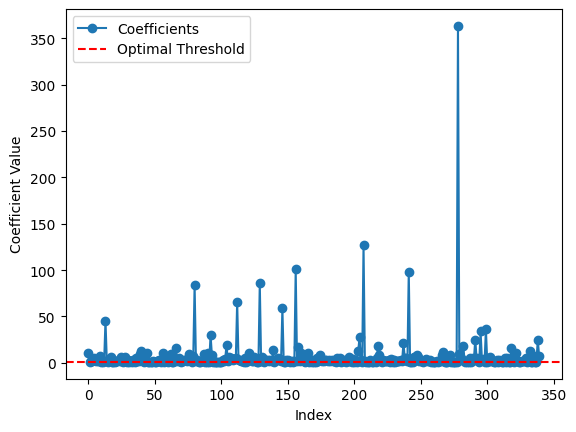

Optimal Threshold: 1.0
Optimal Results:
Total Bets: 1020.0
Total Wins: 6869.541000000001
Total Losses: 0
Net Profit: 6869.541000000001


In [72]:
bet_amount = 3.0  # Replace with your actual bet amount

optimal_threshold, optimal_results = find_optimal_threshold(coefficients, bet_amount)

# Plot historical coefficients
plt.plot(coefficients, marker='o', label='Coefficients')

# Plot the red line at the optimal threshold
plt.axhline(y=optimal_threshold, color='red', linestyle='--', label='Optimal Threshold')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Coefficient Value')
plt.legend()

# Show the plot
plt.show()

print("Optimal Threshold:", optimal_threshold)
print("Optimal Results:")
print("Total Bets:", optimal_results[0])
print("Total Wins:", optimal_results[1])
print("Total Losses:", optimal_results[2])
print("Net Profit:", optimal_results[1] - optimal_results[2])

In [9]:

copycoefficients = sorted(coefficients)

print(copycoefficients)
bet_size = 3.0
winslist = []
maxi = 0
for i in range(len(copycoefficients)):
    if i + 1 >= len(copycoefficients) - i - 100000:
        if((len(copycoefficients) - i) * (copycoefficients[i] - 0.01) * bet_size - (len(copycoefficients) ) * bet_size > 0):
            if(winslist[maxi] < (len(copycoefficients) - i) * (copycoefficients[i] - 0.01) * bet_size - (len(copycoefficients) ) * bet_size):
                maxi = i
            #print(f"coefficient: {copycoefficients[i]},", f"hits: {len(copycoefficients) - i}/{len(copycoefficients)},", f"profit = {(len(copycoefficients) - i) * (copycoefficients[i] - 0.01) * bet_size - (len(copycoefficients) ) * bet_size},", f"cost: {i * bet_size}")
        winslist.append((len(copycoefficients) - i) * (copycoefficients[i] - 0.01) * bet_size - (len(copycoefficients) - i) * bet_size)

print(winslist[maxi])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

IndexError: list index out of range

In [85]:
print(winslist)

[-16.259999999999764, -16.230000000000018, -16.199999999999818, -16.170000000000073, -16.139999999999873, -16.110000000000127, -16.079999999999927, -16.050000000000182, -16.019999999999982, -15.990000000000236, -15.960000000000036, -15.930000000000291, -15.899999999999864, -15.86999999999989, -15.839999999999918, -15.809999999999945, -15.779999999999973, -15.75, -15.720000000000027, -15.690000000000055, 0.0, 15.63000000000011, 15.600000000000136, 31.139999999999873, 31.079999999999927, 31.019999999999982, 30.960000000000036, 30.899999999999864, 30.839999999999918, 30.779999999999973, 61.440000000000055, 61.320000000000164, 61.19999999999982, 76.35000000000014, 76.19999999999982, 76.05000000000018, 75.90000000000009, 75.75, 75.60000000000014, 75.44999999999982, 75.30000000000018, 75.15000000000009, 75.0, 89.82000000000016, 89.63999999999987, 89.46000000000004, 89.27999999999997, 89.10000000000014, 88.92000000000007, 103.52999999999997, 103.32000000000016, 103.11000000000013, 102.9000000

In [80]:
import hashlib

def get_sha512_hash(seed1, seed2, seed3, seed4):
    # Concatenate the seeds into a single string
    combined_seeds = f"{seed1}{seed2}{seed3}{seed4}"

    # Compute the SHA512 hash of the combined seeds
    sha512_hash = hashlib.sha512(combined_seeds.encode()).hexdigest()

    return sha512_hash

# Example seeds
seed1 = "sBXhY0bKukbUste7IPhZvO2qDkjjqG7kUAcfiT8q"
seed2 = "GQWvTKMk2bY7AAnEPP3X"
seed3 = "qDngQ9KpliyiXOyNVVjj"
seed4 = "GDfm293QEnKuYo1aCluf"

# Get the SHA512 hash of the four seeds
hash_result = get_sha512_hash(seed1, seed2, seed3, seed4)
print("SHA512 hash:", hash_result)


SHA512 hash: 68e0eddd4c081984a6d5a31f06190081d5d53c66138e47074e6b0f901bf145893a5647c08d61ab1d5e85c98a83350a55f81d5a9c4c88e073103b8d55f9e4d5ef


In [82]:
import hashlib
import random

def get_random_hex_from_hash(hash_string, num_digits):
    # Convert the hash string to an integer
    hash_int = int(hash_string, 16)

    # Get a random number within the range of the hash integer
    random.seed(hash_int)
    random_hex = hex(random.randint(0, hash_int))[2:]  # [2:] to remove '0x' prefix

    # Make sure the random_hex has desired length
    random_hex = random_hex.zfill(num_digits)

    return random_hex

# Example SHA512 hash
sha512_hash = hash_result

# Generate a random hexadecimal number with 8 digits from the hash
random_hex = get_random_hex_from_hash(sha512_hash, 16)
print("Random Hexadecimal Number:", random_hex)


Random Hexadecimal Number: 585905353fbc2e1f533ed96f708cc5446772ddcc1470a1f58a2ec8118b615f1ce034a5f54d426873c095f6fda86c85c797a6a8f6d93968f455ba16406fbf884b
